<a href="https://colab.research.google.com/github/raquellecampos/Machine_Learning/blob/main/Rede_Neural.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import torch
import torch.nn.functional as F
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim

In [17]:
transform = transforms.ToTensor()  # definindo a conversão de imagem para tensor

trainset = datasets.MNIST('./MNIST_data/', download=True, train=True, transform=transform) # Criando a parte do treino do dataset
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)  # Criando um buffer para pegar os dados por parte

valset = datasets.MNIST('./MNIST_data/', download=True, train=False, transform=transform) # Carrega a parte de validação do dataset
valloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True) # Cria um buffer para pegar os dados por parte

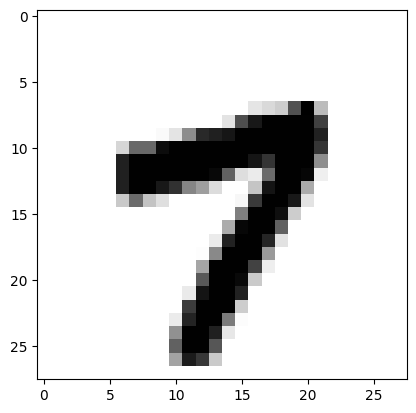

In [24]:
dataiter = iter(trainloader)
imagens, etiquetas = dataiter.__next__()
plt.imshow(imagens[0].numpy().squeeze(), cmap='gray_r');

In [26]:
print(imagens[0].shape)  # verificar as dimenções do tesor de cada imagem
print(etiquetas[0].shape)  # verificar as dimenções do tesor de cada etiqueta

torch.Size([1, 28, 28])
torch.Size([])


In [27]:
class Modelo(nn.Module):
  def __init__(self):
    super(Modelo, self).__init__()
    self.linear1 = nn.Linear(28*28, 128)  # Camada de entrada, 784 neurônios que se ligam a 128
    self.linear2 = nn.Linear(128, 64)  # camada interna 1, 128 neurônios que se ligam a 64
    self.linear3 = nn.Linear(64, 10)  # camada interna 2, 64 neurônios que se ligam a 10
    # para camada de saida não é necessário definir nada pois só precisamos pegar o output da camada interna 2

    def forward(self,X):
      X = F.relu(self.linear1(X))  # função de ativação da camada de entrada para camada interna 1
      X = F.relu(self.linear2(X))  # função de ativação da camada interna 1 para camada interna 2
      X = self.linear3(X) # Função de ativação da camada interna 2 para camada de saida, nesse caso f(x) = x
      return F.log_softmax(X, dim=1)  # dados utilizados para calcular a perda